# Deep Learning Basics

## A Single Neuron

A single neuron can be described very simply.  Once a single neuron is implmented, they can be chain together and arranged in more complexe patterns in order to create more advanced models.  Mathmatically, a neuron takes an input $x$ and returns an output $y$. 

<img src="https://live.staticflickr.com/65535/53206200362_2125d8b1fe_b.jpg" width="1024" height="201" alt="SingleNeuron"/>

Looking inside the neuron, we see the following equation

$$ y = sigmoid(wx + b) $$

where $w$ and $b$ are the parameters of the neuron, also known as the $weight$ and the $bias$.  The $sigmoid$ is a non linear function that transforms any value in the domain to a number between 0 and 1.  Other popular non linear functions that could be used here include ReLU, TanH, and Leaky ReLU.  The $sigmoid$ function in this case can be given as

$$ sigmoid(z) = \frac{1}{1 + e^{-z}} $$

Let's define all this functionality in a Python class!

In [4]:
import numpy as np

class Neuron():
    
    # The weight and bias are the two parameters of our neuron
    weight = 0
    bias = 0

    def sigmoid(self, input):
        """ Transforms input to value between 0 and 1 """
        return 1 / (1 + np.exp(-input))

    def forward(self, input):
        """ Run a number or array of number through the neuron """
        x = self.weight * input + self.bias
        return self.sigmoid(x)

A sigmoid function is a mathematical function with a characteristic "S"-shaped curve or sigmoid curve. It transforms any value in the domain to a number between 0 and 1. A plot for this function is shown below.

Text(0, 0.5, 'sigmoid(z)')

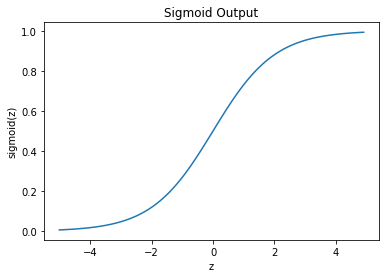

In [5]:
import matplotlib.pyplot as plt

# Calculate the output the sigmoid over the range [-5, 5]
neuron = Neuron()
array_size = 100
sigmoid_output = np.zeros(array_size)
z = np.zeros(array_size)
for i in range(array_size):
    z[i] = (i / 10) - 5
    sigmoid_output[i] = neuron.sigmoid(z[i])

# Plot the sigmoid function
plt.plot(z, sigmoid_output)
plt.title("Sigmoid Output")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

## Loss Function

Now we have our neuron, we can use it to estimate a function.  In a real world situation, data will come in the form of an input and an output, so let's define some example data

| Input : $x$ | Output : $y$ |
| ----- | ------ |
| 1 | 0.500 |
| 0 | 0.438 |
| -1 | 0.378 |

The function mapping between these inputs and outputs is $ y = sigmoid(wx + b) $. But what are $w$ and $b$? For this example, let's use the first row of our table, making our input $x=1$ and our target output $y_t=0.5$. Below we will try out a bunch of possible values for $w$ and $b$.  However, we need a way to measure how close each combination of $w$ and $b$ gets us to our desired output $y_t$. For this purpose we will define a loss function $L$. A loss function is metric to define how close we are to the correct answer.  The lower the loss function is, the closer we are to the true answer.  In this example we use mean squared error loss, which is defined like so

$$ L=( y_t - y )^2 $$

Below we will plot this loss function against a bunch of possible values for the weight and bias.  And remember, the lower the loss function, the closer we are to the true weight and bias.

Text(0.5, 0, 'Loss Score')

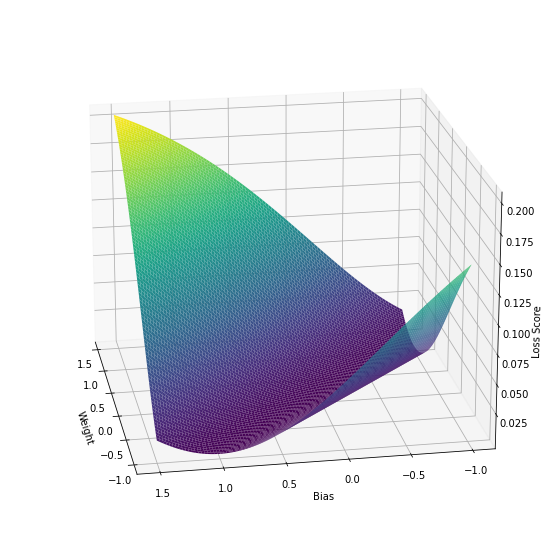

In [6]:
# syntax for 3-D projection
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

# x and y axis
weights = np.linspace(-1, 1.5, 100)
biases = np.linspace(-1, 1.5, 100)
W, B = np.meshgrid(weights, biases)

# Define the input and output
x = 1    # Input
y = 0.5  # Output

# Run our grid of data through our neuron
neuron.weight = W
neuron.bias = B
neuron_output = neuron.forward(np.ones_like(weights) * x)

# Calculate the loss score (mean squared error) 
loss = (y - neuron_output) ** 2

# Plot our data
ax.view_init(elev=20, azim=170)
ax.plot_surface(W, B, loss, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss Score')
ax.set_title('3D Loss Landscape')

## Backpropagation

Calculating every possible combination of $w$ and $b$ isn't the most efficient way to find our parameters, so instead we will use an algorithm called backpropagation.  This will involve finding the following differentials

$$ \frac{\partial L}{\partial w} , \frac{\partial L}{\partial b}$$ 

In plain English, we want to know how much, and in which direction, $L$ moves when you we make slight changes to $w$ and $b$.  So how can we calculate these values?  We dont know these differentials directally, but was can calculate them using the chain rule

$$
 \frac{\partial L}{\partial w} = \frac{\partial z}{\partial w} \times \frac{\partial y}{\partial z} \times \frac{\partial L}{\partial y}
$$
$$
 \frac{\partial L}{\partial b} = \frac{\partial z}{\partial b} \times \frac{\partial y}{\partial z} \times \frac{\partial L}{\partial y}
$$

where 
 - $L=( y_t - y )^2$
 - $y=sigmoid(z)$
 - $z=wx+b$
 - $w=weight$
 - $b=weight$

 Differentiating and then substituting these values in gives us
 
$$
 \frac{\partial L}{\partial w} = x \times y (1-y) \times 2 (y_t - y)
$$

$$
 \frac{\partial L}{\partial b} = 1 \times y (1-y) \times 2 (y_t - y)
$$

Take some time to remind yourself of the chain rule and convince yourself that these derivations are accurate.  Now we have these derivatives, we can use them to update our weight and bias parameters like so

$$ w = w - \alpha \frac{\partial L}{\partial w} $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$

Where $\alpha$ is the step size.  This process moves us closer to the minimum point in our loss function, so it will need to be repeated several times before we have an optimial solution for $w$ and $b$. 


In [20]:
def backprop(self, x, y_target):
    # Get output from our neuron
    y = self.forward(x)

    # Calculate derivatives
    dz_dw = x
    dz_db = 1
    dy_dz = y * (1 - y)
    dL_y = 2 * (y - y_target)

    # Apply the chain rule
    dL_dw = dz_dw * dy_dz * dL_y
    dL_db = dz_db * dy_dz * dL_y

    # Update the parameters
    step_size = 1.5
    self.weight = self.weight - step_size * dL_dw
    self.bias = self.bias - step_size * dL_db

# Add this new backprop function to the neuron object
neuron.backprop = backprop

Text(0.5, 0.92, '3D Loss Landscape')

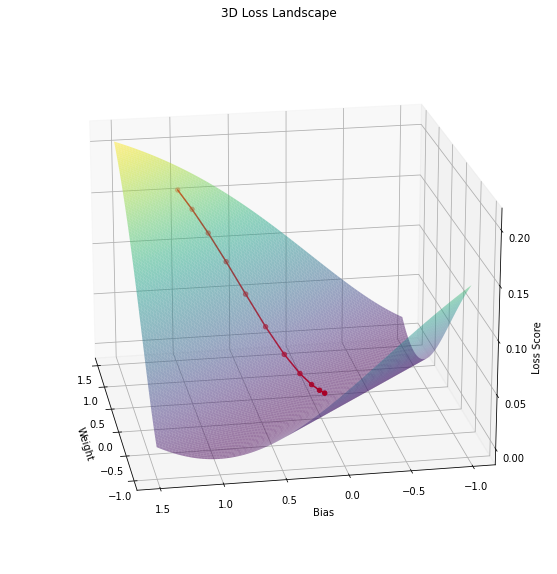

In [30]:
# syntax for 3-D projection
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

# Plot our data
ax.view_init(elev=20, azim=170)
ax.plot_surface(W, B, loss, rstride=1, cstride=1, cmap='viridis', alpha=0.5)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss Score')

# Set some inital value for w and b (these can be anything)
neuron.weight = 1.25
neuron.bias = 1

# Repeat the backpropagation algorithm several times and save the results
total_steps = 10
weight_steps = [neuron.weight, ]
bias_steps = [neuron.bias, ]
loss_steps = [(y - neuron.forward(x)) ** 2]
for i in range(total_steps):
    neuron.backprop(neuron, x, y)
    weight_steps.append(neuron.weight)
    bias_steps.append(neuron.bias)
    loss_steps.append((y - neuron.forward(x)) ** 2)

# Convert track to numpy arrays
ls = np.array(loss_steps)
ws = np.array(weight_steps)
bs = np.array(bias_steps)

# plot tracks
ax.scatter(ws, bs, ls, c='red')
ax.plot3D(ws, bs, ls, c='red')
ax.set_title('3D Loss Landscape')

As can be seen on the plot, we start from the point $(1,1)$, and gradually step towards an optiminal solution at $(-0.062, 0.187)$.  It's worth playing around with some of the setting in the code and seeing how it changes the plot.  In partiular, I would recommend altering the starting values of `neuron.weight` and `neuron.bias`, as well as changing the `total_steps` and `step_size` variables.

Now you know how a single neuron works.  It will be much more intuative to see how neural network, which can sometimes contain billions of neurons chained together, work. For a good description of how a larger neural network works, check out [this very good video](https://www.youtube.com/watch?v=TwUKy1yfFOk).